<a href="https://colab.research.google.com/github/AnejVollmeier/Analiza-trga-kriptovalut-in-napoved-gibanja-cen/blob/main/Kriptovalute_Anej_Vollmeier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Analiza trga kriptovalut in napoved gibanja cen**

##**1.1 Pridobivanje podatkov**

*Pridobimo podatke o kriptovalutah iz spletnega CoinGecko API-ja. Podatki se združijo v DataFrame, iz katerega izberemo samo pomembne stolpce. Na koncu podatke shranimo v CSV datoteko, ki jo uporabimo pri nadaljnji obdelavi.*

In [1]:
import requests
import pandas as pd
import time

all_data = []

for page in range(1, 4):  # 3 strani * 100 = 300
    url = "https://api.coingecko.com/api/v3/coins/markets"
    params = {
        "vs_currency": "eur",
        "order": "market_cap_desc",
        "per_page": 100,
        "page": page,
        "sparkline": "false",
        "price_change_percentage": "1h,24h,7d,30d,1y"
    }

    response = requests.get(url, params=params, timeout=30)

    # Zaščita pred preveč zahtevki
    if response.status_code == 429:
        print("Preveč zahtevkov – čakam 10 sekund …")
        time.sleep(10)
        response = requests.get(url, params=params, timeout=30)

    response.raise_for_status()
    all_data.extend(response.json())

    time.sleep(2)  # Obvezen zamik zaradi CoinGecko omejitev

df = pd.DataFrame(all_data)

columns = [
    "id",
    "symbol",
    "name",

    # Rang
    "market_cap_rank",
    "market_cap",
    "fully_diluted_valuation",

    # Cena
    "current_price",
    "total_volume",

    # Nihanje cen
    "high_24h",
    "low_24h",

    # Spremembe
    "price_change_percentage_1h_in_currency",
    "price_change_percentage_24h_in_currency",
    "price_change_percentage_7d_in_currency",
    "price_change_percentage_30d_in_currency",
    "price_change_percentage_1y_in_currency",
]

# Varno: izberi samo obstoječe stolpce
df = df.loc[:, [c for c in columns if c in df.columns]].copy()

df.to_csv(
    "coingecko_kriptovalute.csv",
    sep=";",
    decimal=",",
    index=False,
)

df.head()

,id,symbol,name,market_cap_rank,market_cap,fully_diluted_valuation,current_price,total_volume,high_24h,low_24h,price_change_percentage_1h_in_currency,price_change_percentage_24h_in_currency,price_change_percentage_7d_in_currency,price_change_percentage_30d_in_currency,price_change_percentage_1y_in_currency
0,bitcoin,btc,Bitcoin,1,1540451188338,1540451188338,77256.000000,1.958470e+10,77270.000000,76242.000000,-0.018838,0.748083,3.829077,-2.414981,-19.042375
1,ethereum,eth,Ethereum,2,321710225542,321710225542,2665.170000,9.497808e+09,2672.050000,2627.380000,0.228609,-0.027083,6.985794,-0.659233,-24.032193
2,tether,usdt,Tether,3,159476323674,164135857336,0.852364,3.735883e+10,0.852582,0.852204,0.002344,-0.010101,0.412969,-0.756169,-12.082974
3,ripple,xrp,XRP,4,104123436151,171580042467,1.720000,2.188194e+09,1.750000,1.700000,0.333156,0.090272,8.867600,-4.434646,-27.556437
4,binancecoin,bnb,BNB,5,103223432895,103223432895,749.410000,8.740663e+08,752.950000,741.060000,-0.023706,-0.458857,4.803490,-3.411968,8.207662


*Iz CSV datoteke naložimo podatke o kriptovalutah v DataFrame. Pri uvozu določimo ločilo, decimalni znak in stolpec **id** nastavimo kot indeks.*

In [2]:
df = pd.read_csv(
    "coingecko_kriptovalute.csv",
    sep=";",
    decimal=",",
    index_col = 0
)
df.head()

,symbol,name,market_cap_rank,market_cap,fully_diluted_valuation,current_price,total_volume,high_24h,low_24h,price_change_percentage_1h_in_currency,price_change_percentage_24h_in_currency,price_change_percentage_7d_in_currency,price_change_percentage_30d_in_currency,price_change_percentage_1y_in_currency
id,,,,,,,,,,,,,,
bitcoin,btc,Bitcoin,1,1540451188338,1540451188338,77256.000000,1.958470e+10,77270.000000,76242.000000,-0.018838,0.748083,3.829077,-2.414981,-19.042375
ethereum,eth,Ethereum,2,321710225542,321710225542,2665.170000,9.497808e+09,2672.050000,2627.380000,0.228609,-0.027083,6.985794,-0.659233,-24.032193
tether,usdt,Tether,3,159476323674,164135857336,0.852364,3.735883e+10,0.852582,0.852204,0.002344,-0.010101,0.412969,-0.756169,-12.082974
ripple,xrp,XRP,4,104123436151,171580042467,1.720000,2.188194e+09,1.750000,1.700000,0.333156,0.090272,8.867600,-4.434646,-27.556437
binancecoin,bnb,BNB,5,103223432895,103223432895,749.410000,8.740663e+08,752.950000,741.060000,-0.023706,-0.458857,4.803490,-3.411968,8.207662


##**1.2 Predprocesiranje podatkov**

*`df.shape` --> preverimo dimenzije DataFrame-a, torej število vrstic in stolpcev.*

In [3]:
df.shape

(300, 14)

*`df.info()` --> prikaže osnovne informacije o DataFrame-u, kot so imena stolpcev, tipi podatkov in število manjkajočih vrednosti.*

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, bitcoin to lombard-protocol
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   symbol                                   300 non-null    object 
 1   name                                     300 non-null    object 
 2   market_cap_rank                          300 non-null    int64  
 3   market_cap                               300 non-null    int64  
 4   fully_diluted_valuation                  300 non-null    int64  
 5   current_price                            300 non-null    float64
 6   total_volume                             292 non-null    float64
 7   high_24h                                 298 non-null    float64
 8   low_24h                                  298 non-null    float64
 9   price_change_percentage_1h_in_currency   298 non-null    float64
 10  price_change_percentage_24h_in_curre

*`df.isnull().sum()`-->prikaže število manjkajočih vrednosti v vsakem stolpcu DataFrame-a*

In [5]:
df.isnull().sum()

,0
symbol,0
name,0
market_cap_rank,0
market_cap,0
fully_diluted_valuation,0
current_price,0
total_volume,8
high_24h,2
low_24h,2
price_change_percentage_1h_in_currency,2


*Odstranimo stolpce, ki niso pomembni za nadaljnjo analizo ali vsebujejo preveč manjkajočih vrednosti.*

*  symbol(ni pomemben)
*   name(ni pomemben)
*   price_change_percentage_1y_in_currency(prevec mankajočih vrednosti)





In [6]:
df = df.drop(columns=[
    "symbol",
    "name",
    "price_change_percentage_1y_in_currency",
])

df.head(3)

,market_cap_rank,market_cap,fully_diluted_valuation,current_price,total_volume,high_24h,low_24h,price_change_percentage_1h_in_currency,price_change_percentage_24h_in_currency,price_change_percentage_7d_in_currency,price_change_percentage_30d_in_currency
id,,,,,,,,,,,
bitcoin,1,1540451188338,1540451188338,77256.000000,1.958470e+10,77270.000000,76242.000000,-0.018838,0.748083,3.829077,-2.414981
ethereum,2,321710225542,321710225542,2665.170000,9.497808e+09,2672.050000,2627.380000,0.228609,-0.027083,6.985794,-0.659233
tether,3,159476323674,164135857336,0.852364,3.735883e+10,0.852582,0.852204,0.002344,-0.010101,0.412969,-0.756169


*Izberemo vse številske stolpce in manjkajoče vrednosti zapolnimo z mediano. Nato preverimo, da v DataFrame-u ni več manjkajočih podatkov*

*   `median()`--> srednja vrednost v urejenem naboru podatkov



In [7]:
num = df.select_dtypes(exclude=object).columns
df[num] = df[num].fillna(df[num].median())

df.isnull().sum()

,0
market_cap_rank,0
market_cap,0
fully_diluted_valuation,0
current_price,0
total_volume,0
high_24h,0
low_24h,0
price_change_percentage_1h_in_currency,0
price_change_percentage_24h_in_currency,0
price_change_percentage_7d_in_currency,0


*Dodamo novo lastnost, ki meri relativno 24-urno volatilnost kriptovalut. S tem želimo bolje opisati, kako močno se cena posamezne kriptovalute spreminja glede na njeno trenutno vrednost.*

In [8]:
# Relativno 24h nihanje cen
df["range_24h_rel"] = (df["high_24h"] - df["low_24h"]) / df["current_price"]

df.isnull().sum()

,0
market_cap_rank,0
market_cap,0
fully_diluted_valuation,0
current_price,0
total_volume,0
high_24h,0
low_24h,0
price_change_percentage_1h_in_currency,0
price_change_percentage_24h_in_currency,0
price_change_percentage_7d_in_currency,0


*Standardiziramo številske podatke z uporabo* **StandardScaler**

In [9]:
from sklearn.preprocessing import StandardScaler

df[num] = StandardScaler().fit_transform(df[num])

df.head(3)

,market_cap_rank,market_cap,fully_diluted_valuation,current_price,total_volume,high_24h,low_24h,price_change_percentage_1h_in_currency,price_change_percentage_24h_in_currency,price_change_percentage_7d_in_currency,price_change_percentage_30d_in_currency,range_24h_rel
id,,,,,,,,,,,,
bitcoin,-1.726287,16.742712,11.677231,4.185277,7.690061,4.169351,4.214772,-0.317069,-0.075012,-0.208585,-0.045614,0.013306
ethereum,-1.714740,3.415965,2.345033,-0.104897,3.664561,-0.105081,-0.104229,-0.093279,-0.205084,-0.000158,0.034436,0.016761
tether,-1.703193,1.641962,1.138447,-0.258139,14.783405,-0.258139,-0.258328,-0.297913,-0.202235,-0.434139,0.030016,0.000443


##**1.3 Vizualizacija podatkov**

###**1.3.1 GRAF 1**

*Krožni diagram prikazuje, kolikšen delež celotne tržne kapitalizacije zavzema 5 največjih kriptovalut v primerjavi z vsemi ostalimi kriptovalutami skupaj.*

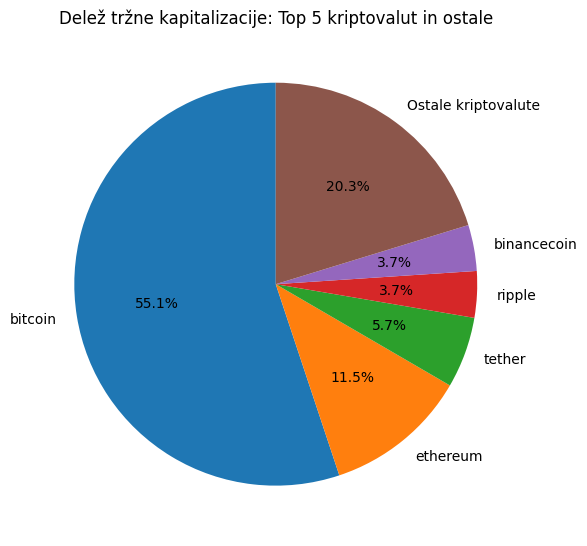

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df_raw = pd.read_csv(
    "coingecko_kriptovalute.csv",
    sep=";",
    decimal=",",
    index_col=0
)

top5 = df_raw.sort_values("market_cap", ascending=False).head(5)

total_market_cap = df_raw["market_cap"].sum()

top5_caps = top5["market_cap"]

others_cap = total_market_cap - top5_caps.sum()

labels = list(top5.index) + ["Ostale kriptovalute"]
sizes = list(top5_caps) + [others_cap]

plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct="%.1f%%",
    startangle=90
)
plt.title("Delež tržne kapitalizacije: Top 5 kriptovalut in ostale")
plt.tight_layout()
plt.show()

###**1.3.1 GRAF 2**

*Stolpčni graf prikazuje povprečna 24-urna nihanja cen kriptovalut v posameznih skupinah glede na njihov tržni rang.*

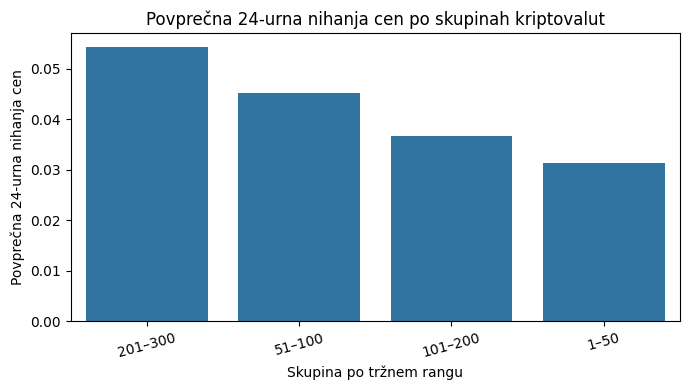

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Pripravimo podatke
df_rank = df.sort_values("market_cap_rank").copy()

# 2) Dodamo pozicijo
df_rank["rank_pos"] = np.arange(1, len(df_rank) + 1)

# 3) Ustvarimo skupine po rangu
df_rank["rank_group"] = "201–300"
df_rank.loc[df_rank["rank_pos"] <= 200, "rank_group"] = "101–200"
df_rank.loc[df_rank["rank_pos"] <= 100, "rank_group"] = "51–100"
df_rank.loc[df_rank["rank_pos"] <= 50,  "rank_group"] = "1–50"

# 4) Povprečna dnevna nihanja cen po skupinah
avg_change_by_rank = (
    df_rank.groupby("rank_group")["range_24h_rel"]
          .mean()
          .sort_values(ascending=False)
)

# 5) Barplot
plt.figure(figsize=(7, 4))
sns.barplot(x=avg_change_by_rank.index, y=avg_change_by_rank.values)
plt.title("Povprečna 24-urna nihanja cen po skupinah kriptovalut")
plt.xlabel("Skupina po tržnem rangu")
plt.ylabel("Povprečna 24-urna nihanja cen")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

###**1.3.1 GRAF 3**

*Ta graf prikazuje korelacijsko matriko izbranih numeričnih lastnosti v obliki toplotnega zemljevida.*

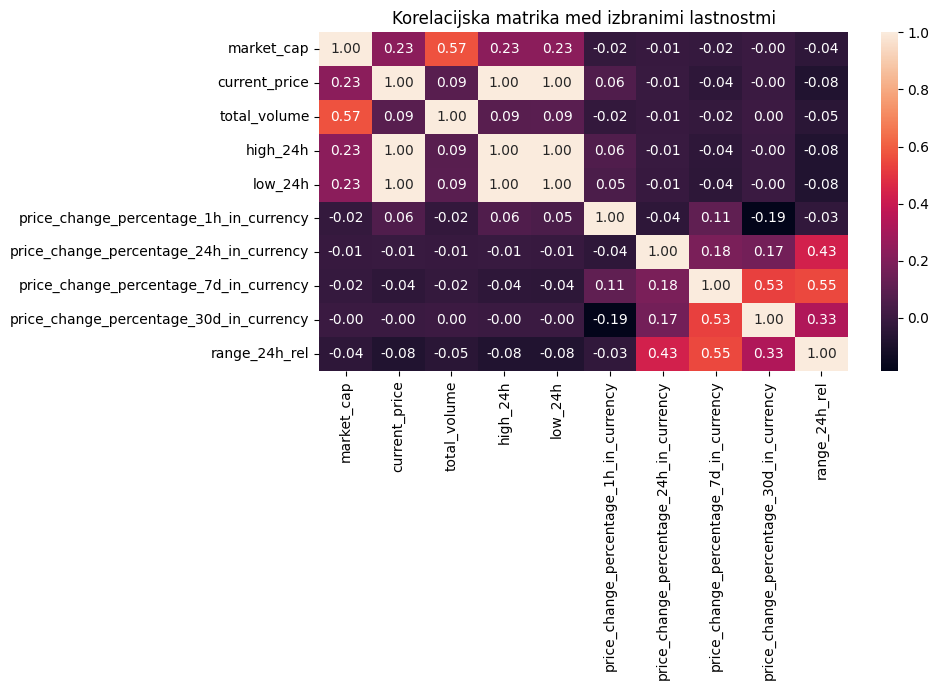

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = [
    "market_cap",
    "current_price",
    "total_volume",
    "high_24h",
    "low_24h",
    "price_change_percentage_1h_in_currency",
    "price_change_percentage_24h_in_currency",
    "price_change_percentage_7d_in_currency",
    "price_change_percentage_30d_in_currency",
    "range_24h_rel",
]

corr = df[num_cols].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Korelacijska matrika med izbranimi lastnostmi")
plt.tight_layout()
plt.show()

##**1.4 Regresija**

###**1.4.1 Priprava podatkov za učenje modela**

*Določimo vhodne lastnosti (**vhod**), ki opisujejo trenutno stanje trga kriptovalut, ter izhodno spremenljivko (**izhod**), ki predstavlja 7-dnevno spremembo cene.*

In [13]:
vhod = df[
    [
        "market_cap",
        "total_volume",
        "current_price",
        "range_24h_rel",
        "price_change_percentage_1h_in_currency",
        "price_change_percentage_24h_in_currency",
    ]
]
izhod = df["price_change_percentage_7d_in_currency"]

*Razdelimo podatke na učno in testno množico. Učna množica se uporabi za učenje modela, testna pa za preverjanje, kako dobro se model nauči na novih podatkih.*

In [14]:
from sklearn.model_selection import train_test_split

#Razdekitev na ucno in testno mnozico
x_train, x_test, y_train, y_test = train_test_split(
    vhod, izhod, test_size=0.2, random_state=42
)

###**1.4.2 Linearna regresija**

*Uporabimo algoritem **linearna regresija**, s katerim model naučimo povezavo med vhodnimi lastnostmi in izhodno spremenljivko. Model nato uporabimo za napoved na testnih podatkih in njegovo uspešnost ocenimo z metrikama **MAE** in **R²**.*

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

#Uporaba algoritma
lin_reg = LinearRegression()

#Učenje modela
lin_reg.fit(x_train, y_train)

#Napoved na testnih podatkih
rez_lin = lin_reg.predict(x_test)

# Metrike za vrednotenje uspešnosti modela
mae_lin = mean_absolute_error(y_test, rez_lin)
r2_lin = r2_score(y_test, rez_lin)

print("Linearna regresija")
print("MAE:", mae_lin)
print("R2:", r2_lin)

Linearna regresija
MAE: 0.6605422634324095
R2: -0.48115385377034614


###**1.4.3 Naključni gozd regresija**

*Uporabimo algoritem **Random Forest** regresija, ki temelji na več odločitvenih drevesih. Model naučimo na učnih podatkih, nato pa ocenimo njegovo uspešnost na testnih podatkih z metrikama **MAE** in **R²**.*

In [16]:
from sklearn.ensemble import RandomForestRegressor

#Uporaba algoritma
rf_reg = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

#Učenje modela
rf_reg.fit(x_train, y_train)

#Napoved na testnih podatkih
rez_rf = rf_reg.predict(x_test)

# Metrike za vrednotenje uspešnosti modela
mae_rf = mean_absolute_error(y_test, rez_rf)
r2_rf = r2_score(y_test, rez_rf)

print("Naključni gozd regresija")
print("MAE:", mae_rf)
print("R2:", r2_rf)

Naključni gozd regresija
MAE: 0.5598487055952063
R2: -0.27428632065816205


###**1.4.4 Rezultati regresijskih modelov**

*Primerjamo uspešnost **linearne regresije** in **Random Forest** regresije. Na podlagi metrik **MAE** in **R²**.*

*Metriki smo izbrali, ker skupaj omogočata jasno oceno natančnosti napovedi in splošne uspešnosti regresijskega modela.*

*   **`mean_absolute_error` (povprečna absolutna napaka)**--> meri povprečno absolutno razliko med dejanskimi in napovedanimi vrednostmi.


*   **`r2_score` (koeficient determinacije)** --> pove, kako dobro model pojasni razpršenost podatkov, pri čemer višja vrednost pomeni boljše prileganje modela podatkom.

In [17]:
print("Primerjava modelov")
print("Linearna regresija → MAE:", mae_lin, "R2:", r2_lin)
print("Naključni gozd → MAE:", mae_rf, "R2:", r2_rf)

Primerjava modelov
Linearna regresija → MAE: 0.6605422634324095 R2: -0.48115385377034614
Naključni gozd → MAE: 0.5598487055952063 R2: -0.27428632065816205


***Naključni gozd** ima nižjo vrednost **MAE**, kar pomeni natančnejše povprečne napovedi, medtem ko obe metodi dosegata negativno vrednost **R²**. Kljub temu **Naključni gozd** v primerjavi z linearno regresijo dosega nekoliko boljše rezultate.*

##**1.5 Klascifikacija**

###**1.5.1 Pripava podatkov za ucenje modela**

Določimo **vhodne** lastnosti, ki opisujejo trenutno stanje kriptovalute in trga. **Izhodno** spremenljivko pripravimo za klasifikacijo, tako da 7-dnevno spremembo cene pretvorimo v razreda **rast (1)** ali **padec (0)**.

In [18]:
vhod = df[
    [
        "market_cap",
        "total_volume",
        "current_price",
        "range_24h_rel",
        "price_change_percentage_1h_in_currency",
        "price_change_percentage_24h_in_currency",
    ]
]

#rast (1) ali padec (0)
izhod = (df["price_change_percentage_7d_in_currency"] > 0).astype(int)

izhod.value_counts()

,count
price_change_percentage_7d_in_currency,
0,178
1,122


*Razdelimo podatke na učno in testno množico, ki ju uporabimo za učenje in preverjanje klasifikacijskega modela. S tem zagotovimo, da uspešnost modela ocenjujemo na podatkih, ki jih model med učenjem še ni videl.*

In [19]:
from sklearn.model_selection import train_test_split

#Razdekitev na ucno in testno mnozico
x_train, x_test, y_train, y_test = train_test_split(
    vhod, izhod, test_size=0.2, random_state=42
)

###**1.5.2 Logisticna regresija**

*V tem delu kode uporabimo **logistično regresijo** za reševanje problema klasifikacije, kjer napovedujemo, ali bo cena kriptovalute zrasla ali padla. Model naučimo na učnih podatkih in ga nato uporabimo za napoved razredov na testnih podatkih.*

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Uporaba algoritma
log_reg = LogisticRegression(max_iter=1000)

#Učenje modela
log_reg.fit(x_train, y_train)

#Napoved na testnih podatkih
rez_log = log_reg.predict(x_test)

###**1.5.3 Točnost klasifikacijskega modela**

*Ocenimo uspešnost klasifikacijskega modela z metriko točnost.*

* `accuracy_score`(točnost) --> pove, kolikšen delež primerov je model pravilno razvrstil v razreda rast ali padec cene.

In [21]:
# Izračun točnosti klasifikacijskega modela
acc = accuracy_score(y_test, rez_log)

print("Logistična regresija – klasifikacija")
print("Točnost (accuracy):", acc)

Logistična regresija – klasifikacija
Točnost (accuracy): 0.6833333333333333


###**1.5.4 Interaktivna napoved rasti ali padca kriptovalute**

*Uporabnik **sam izbere** kriptovaluto, za katero želimo narediti napoved. Na podlagi **naučenega** klasifikacijskega modela se izpiše verjetnost, ali bo cena izbrane kriptovalute v naslednjih 7 dneh **zrasla** ali **padla**.*

In [22]:
import pandas as pd

# vhodne lastnosti(enake kot pri učenju)
lastnosti = [
    "market_cap",
    "total_volume",
    "current_price",
    "range_24h_rel",
    "price_change_percentage_1h_in_currency",
    "price_change_percentage_24h_in_currency",
]

def napovej_verjetnost(coin_id):

    # preverimo, ali kriptovaluta obstaja v podatkih
    if coin_id not in df.index:
        print("Kriptovaluta ne obstaja v podatkih.")
        return

    # pripravimo vhod
    vhod = pd.DataFrame(
        [df.loc[coin_id, lastnosti]],
        columns=lastnosti
    )

    # izračun verjetnosti
    verjetnosti = log_reg.predict_proba(vhod)[0]

    print(f"Kriptovaluta: {coin_id}")
    print(f"Verjetnost PADCA v 7 dneh: {verjetnosti[0]:.2f}")
    print(f"Verjetnost RASTI v 7 dneh: {verjetnosti[1]:.2f}")

# ===== uporaba =====
coin_id = input("Vnesi ID kriptovalute (npr. solana): ").strip().lower()
napovej_verjetnost(coin_id)


Vnesi ID kriptovalute (npr. solana): ripple
Kriptovaluta: ripple
Verjetnost PADCA v 7 dneh: 0.63
Verjetnost RASTI v 7 dneh: 0.37


*Model smo naučili na podatkih vseh kriptovalut, saj posamezna kriptovaluta ne vsebuje dovolj podatkov za samostojno učenje modela. Čeprav se kriptovalute med seboj razlikujejo, model zajame skupne lastnosti trga, ki vplivajo na kratkoročno gibanje cen.*

###**1.5.5 Ansambelska metoda (VotingClassifier)**

*Uporabili smo heterogeno ansambelsko metodo VotingClassifier, ki združuje več različnih klasifikacijskih algoritmov (**logistična regresija**, **Random Forest** in **KNN**).*

* `voting="soft"` --> vsak posamezen model izračuna verjetnosti pripadnosti posameznim razredom. Te verjetnosti se nato združijo s povprečenjem, končna napoved pa je razred z najvišjo skupno verjetnostjo.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Vhodni podatki
vhod = df[
    [
        "market_cap",
        "total_volume",
        "current_price",
        "range_24h_rel",
        "price_change_percentage_1h_in_currency",
        "price_change_percentage_24h_in_currency",
    ]
]

#izhod
izhod = (df["price_change_percentage_7d_in_currency"] > 0).astype(int)

#Razdekitev na ucno in testno mnozico
x_train, x_test, y_train, y_test = train_test_split(
    vhod,
    izhod,
    test_size=0.2,
    random_state=42,
    stratify=izhod
)

#Uporaba algoritmov
log_reg = LogisticRegression(max_iter=1000, random_state=42)
rf_kla = RandomForestClassifier(n_estimators=200, random_state=42)
knn_kla = KNeighborsClassifier(n_neighbors=7)

#Učenje modelov
log_reg.fit(x_train, y_train)
rf_kla.fit(x_train, y_train)
knn_kla.fit(x_train, y_train)

#Napoved na testnih podatkih
rez_lr = log_reg.predict(x_test)
rez_rf = rf_kla.predict(x_test)
rez_knn = knn_kla.predict(x_test)

#ansambel
ansambel = VotingClassifier(
    estimators=[
        ("LR", log_reg),
        ("RF", rf_kla),
        ("KNN", knn_kla),
    ],
    voting="soft"  # povpreči verjetnosti modelov
)

#Učenje ansambla
ansambel.fit(x_train, y_train)

#Napoved ansambla
rez_ans = ansambel.predict(x_test)

#matrike
acc_ans = accuracy_score(y_test, rez_ans)

print("Ansambelska metoda (VotingClassifier) – klasifikacija")
print("Točnost (accuracy):", acc_ans)
print("\nMatrika zmede(ansambel):\n", confusion_matrix(y_test, rez_ans))
print("\nKlascifikacisko poročilo (ansambel):\n", classification_report(y_test, rez_ans))

# primerjava točnosti
print("\nPrimerjava točnosti modelov")
print("Logistična regresija:", accuracy_score(y_test, rez_lr))
print("Random Forest:", accuracy_score(y_test, rez_rf))
print("KNN:", accuracy_score(y_test, rez_knn))
print("Ansambel:", acc_ans)


Ansambelska metoda (VotingClassifier) – klasifikacija
Točnost (accuracy): 0.8166666666666667

Matrika zmede(ansambel):
 [[30  6]
 [ 5 19]]

Klascifikacisko poročilo (ansambel):
               precision    recall  f1-score   support

           0       0.86      0.83      0.85        36
           1       0.76      0.79      0.78        24

    accuracy                           0.82        60
   macro avg       0.81      0.81      0.81        60
weighted avg       0.82      0.82      0.82        60


Primerjava točnosti modelov
Logistična regresija: 0.6833333333333333
Random Forest: 0.85
KNN: 0.8
Ansambel: 0.8166666666666667


*Rezultati kažejo, da je imel med posameznimi modeli najboljšo točnost **Random Forest**, medtem ko je **ansambelska metoda** dosegla nekoliko nižjo točnost. Kljub temu **ansambelska metoda** predstavlja pomembno nadgradnjo, saj združuje različne pristope in omogoča bolj stabilne ter zanesljive napovedi.*

##**1.6 Gručenje**

###**1.6.1 Metoda komolca**

In [24]:

dfG = df[
    [
        "market_cap",
        "total_volume",
        "current_price",
        "range_24h_rel",
        "price_change_percentage_1h_in_currency",
        "price_change_percentage_24h_in_currency",
        "price_change_percentage_7d_in_currency",
    ]
]

dfG.head()

,market_cap,total_volume,current_price,range_24h_rel,price_change_percentage_1h_in_currency,price_change_percentage_24h_in_currency,price_change_percentage_7d_in_currency
id,,,,,,,
bitcoin,16.742712,7.690061,4.185277,0.013306,-0.317069,-0.075012,-0.208585
ethereum,3.415965,3.664561,-0.104897,0.016761,-0.093279,-0.205084,-0.000158
tether,1.641962,14.783405,-0.258139,0.000443,-0.297913,-0.202235,-0.434139
ripple,1.036686,0.747423,-0.258089,0.029070,0.001273,-0.185392,0.124091
binancecoin,1.026845,0.222978,-0.215084,0.015866,-0.321472,-0.277536,-0.144248


***Elbow metodo** smo uporabili za določitev optimalnega števila gruč pri algoritmu **KMeans**. Metoda temelji na opazovanju inercije, ki meri znotrajgručne razdalje, in išče točko, kjer se zmanjševanje inercije začne upočasnjevati.*

In [25]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inercije = []
k_vrednosti = range(1, 11)

for k in k_vrednosti:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(dfG)
    inercije.append(kmeans.inertia_)


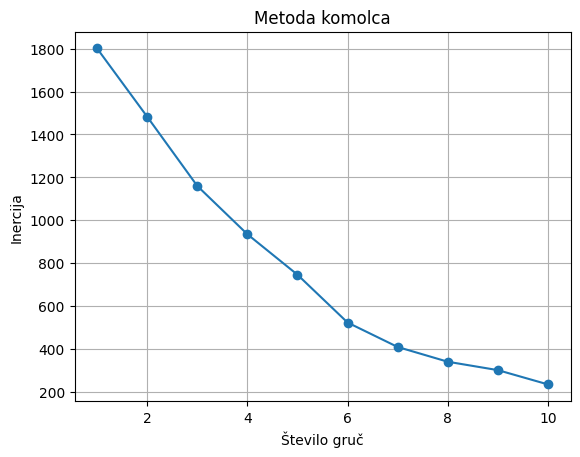

In [26]:
plt.plot(k_vrednosti, inercije, marker='o')
plt.xlabel('Število gruč')
plt.ylabel('Inercija')
plt.title('Metoda komolca')
plt.grid(True)
plt.show()

*Na grafu **Elbow metode** je viden izrazit “komolec” pri štirih gručah, saj se po tej vrednosti zmanjševanje inercije bistveno upočasni. Zato smo kot optimalno število gruč izbrali **k = 4**.*

###**1.6.2 Hierarhično gručenje**

***Dendrogram** smo uporabili za hierarhično gručenje kriptovalut in dodatno preverjanje optimalnega števila gruč.*

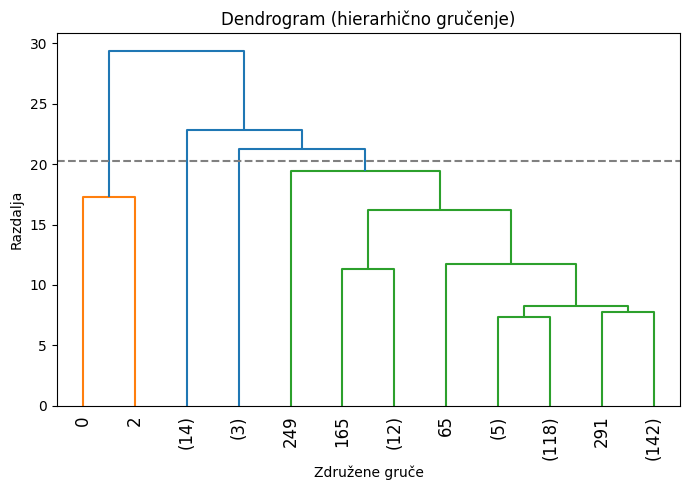

In [32]:
from scipy.cluster.hierarchy import dendrogram, linkage

razdalje = linkage(dfG, method='ward')

nivoji = 12

plt.figure(figsize=(7, 5))
dendrogram(razdalje,
           p=nivoji,
           truncate_mode="lastp",
           leaf_rotation=90);

visina_reza = 20.3

plt.axhline(y=visina_reza,
            linestyle="--",
            color="gray"
)

plt.title("Dendrogram (hierarhično gručenje)")
plt.xlabel("Združene gruče")
plt.ylabel("Razdalja")
plt.tight_layout()
plt.show()


*Na **dendrogramu** je viden večji preskok razdalje pri združevanju gruč, kar nakazuje na naravno delitev podatkov. Na tej podlagi lahko potrdimo izbiro štirih gruč, ki smo jo predhodno določili z **Elbow metodo**.*

###**1.6.3 KMeans**

*Z algoritmom **KMeans** smo kriptovalute razdelili v štiri gruče, pri čemer vsaka kriptovaluta dobi oznako gruče glede na svojo podobnost z drugimi.*

In [28]:
from sklearn.cluster import KMeans

optimalno = 4

kmeans = KMeans(n_clusters=optimalno, random_state=0)

gruče = kmeans.fit_predict(dfG)

df["cluster"] = gruče

df["cluster"].value_counts()

,count
cluster,
1,283
0,13
3,3
2,1


*Algoritem **KMeans** je kriptovalute razdelil v štiri gruče, pri čemer ena gruča vsebuje veliko večino kriptovalut, medtem ko so preostale tri gruče zelo majhne. Manjše gruče predstavljajo kriptovalute, ki po izbranih lastnostih izrazito odstopajo od večine trga. Takšna porazdelitev kaže na prevlado ene večje skupine s podobnim obnašanjem ter nekaj posameznih, bolj specifičnih primerov.*

###**1.6.4 PCA**

***PCA** omogoča vizualizacijo več-dimenzionalnih podatkov v dveh dimenzijah.*

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_komponente = pca.fit_transform(dfG)

# shranimo PCA komponente
df["PCA1"] = pca_komponente[:, 0]
df["PCA2"] = pca_komponente[:, 1]

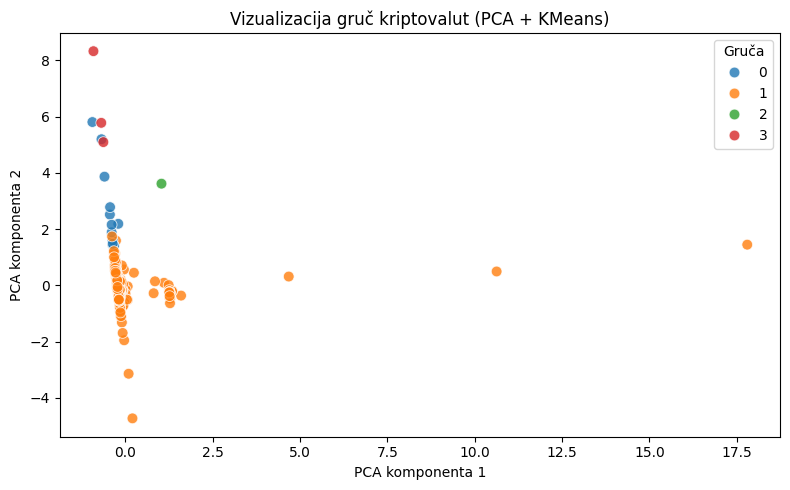

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df,
    x="PCA1",
    y="PCA2",
    hue="cluster",
    palette="tab10",
    s=60,
    alpha =0.8
)

plt.title("Vizualizacija gruč kriptovalut (PCA + KMeans)")
plt.xlabel("PCA komponenta 1")
plt.ylabel("PCA komponenta 2")
plt.legend(title="Gruča")
plt.tight_layout()
plt.show()


*Čeprav se nekatere gruče na **PCA** grafu delno prekrivajo, to ne pomeni, da gručenje ni pravilno. **PCA** prikazuje podatke le v dveh dimenzijah, medtem ko je gručenje izvedeno v več-dimenzionalnem prostoru, kjer so razlike med gručami bolj izrazite.*

###**1.6.5 Analiza gručenja**

*Kriptovalute razdelimo v skupine glede na pripadajočo gručo in za vsako gručo izračuna povprečne vrednosti izbranih lastnosti.*

In [31]:
povprecja_gruc = df.groupby("cluster")[
    [
        "market_cap",
        "total_volume",
        "current_price",
        "range_24h_rel",
        "price_change_percentage_1h_in_currency",
        "price_change_percentage_24h_in_currency",
        "price_change_percentage_7d_in_currency",
    ]
].mean()

povprecja_gruc

,market_cap,total_volume,current_price,range_24h_rel,price_change_percentage_1h_in_currency,price_change_percentage_24h_in_currency,price_change_percentage_7d_in_currency
cluster,,,,,,,
0,-0.091302,-0.060881,-0.258084,0.136839,1.756724,0.482875,2.521266
1,0.005566,0.004214,-0.001712,0.034357,-0.089591,-0.111364,-0.146527
2,-0.097700,-0.125807,4.613657,0.114753,8.569593,1.493890,0.453892
3,-0.096869,-0.091782,-0.258043,0.440303,-2.017555,7.914899,2.745631


* **Gruča 0** vključuje kriptovalute z nižjimi vrednostmi `market_cap`, `total_volume` in `current_price`, hkrati pa izstopa po pozitivnih vrednostih `price_change_percentage_1h_in_currency` in `price_change_percentage_7d_in_currency`.

* **Gruča 1** združuje kriptovalute z vrednostmi blizu povprečja pri večini lastnosti, vendar se razlikuje po rahlo negativnih vrednostih `price_change_percentage_1h_in_currency`, `price_change_percentage_24h_in_currency` in `price_change_percentage_7d_in_currency`.

* **Gruča 2** močno izstopa zaradi izrazito visokega `current_price` ter zelo visokega `price_change_percentage_1h_in_currency`, ob hkrati pozitivnih kratkoročnih spremembah cen.

* **Gruča 3** vključuje kriptovalute z nižjimi vrednostmi `market_cap`, `total_volume` in `current_price`, hkrati pa izstopa po višjem `range_24h_rel` in negativnem `price_change_percentage_1h_in_currency`.

##**1.7 Povzetek rezultatov**

###**1.7.1 Regresija**

**Opis:**


*Pri regresiji smo napovedovali 7-dnevno spremembo cene kriptovalut na podlagi tržnih lastnosti, kot so `market_cap`, `total_volume`, `current_price` in kratkoročne spremembe cen.*

**Analiza:**

***Linearna regresija** in **Random Forest** v tem primeru nista dosegla pozitivnih vrednosti **R²**, kar pomeni, da modela težko pojasnita varianco 7-dnevne spremembe cene. Kljub temu je **Random Forest** dosegel nižjo vrednost **MAE**, kar kaže na natančnejše povprečne napovedi v primerjavi z **linearno regresijo**.*

**Ovrednotenje:**

*Dobljeni rezultati potrjujejo, da je napovedovanje sprememb cen kriptovalut zahtevno, vendar lahko kompleksnejši modeli prispevajo k nekoliko boljši napovedni natančnosti.*

###**1.7.2 Klascifikacija**

**Opis:**


*Pri klasifikaciji smo napovedovali, ali bo cena kriptovalute v naslednjih 7 dneh zrasla ali padla. Uporabili smo več različnih algoritmov in jih med seboj primerjali.*

**Analiza:**

*Rezultati so pokazali, da modeli bolje prepoznavajo padce cen (razred 0) kot rasti (razred 1). **Random Forest** je dosegel najvišjo točnost, **ansambelska metoda** pa je ponudila bolj stabilne napovedi z dobrim ravnovesjem med preciznostjo in priklicem.*

**Ovrednotenje:**

Primerjava rezultatov posameznih modelov je pokazala, da se uspešnost klasifikacije med algoritmi precej razlikuje. Najvišjo točnost je dosegel **Random Forest**, sledita mu **ansambelska metoda**  in **KNN**, medtem ko je **logistična regresij**a dosegla najnižjo točnost. **Ansambelska metoda** sicer ni dosegla najboljše točnosti, vendar je združila prednosti različnih modelov in ponudila bolj uravnotežen pristop k napovedovanju z dobrim razmerjem med preciznostjo in priklicem za oba razreda.


###**1.7.3 Grucenje**

**Opis:**


*Z algoritmom **KMeans** smo kriptovalute razdelili v skupine glede na njihove lastnosti. Število gruč smo določili z **Elbow metodo** in **dendrogramom** ter rezultate prikazali s **PCA**.*

**Analiza:**

*Analiza gruč je pokazala, da se kriptovalute razdelijo v skupine z različnimi značilnostmi, predvsem glede `market_cap`, `total_volume`, `current_price` in kratkoročnih sprememb cen. Večina kriptovalut spada v eno večjo, bolj homogeno skupino, medtem ko manjše gruče predstavljajo posamezne kriptovalute, ki po izbranih lastnostih izraziteje odstopajo od povprečja.*

**Ovrednotenje:**

*Rezultati gručenja kažejo, da je trg kriptovalut mogoče smiselno analizirati z vidika podobnosti, pri čemer večina kriptovalut izkazuje podobno obnašanje.*

# **2. Opomba**

**Zvezek je bil nazadnje pognan 04. 01. 2026 in temelji na podatkih, pridobljenih na ta dan. Ker se podatki o kriptovalutah stalno spreminjajo, se lahko ob ponovnem zagonu zvezka v drugem časovnem obdobju rezultati in pripadajoči komentarji razlikujejo.**

#**Avtor:** *Anej Vollmeier*